In [13]:
#Import de module

import pingouin
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set()
random.seed(2023)

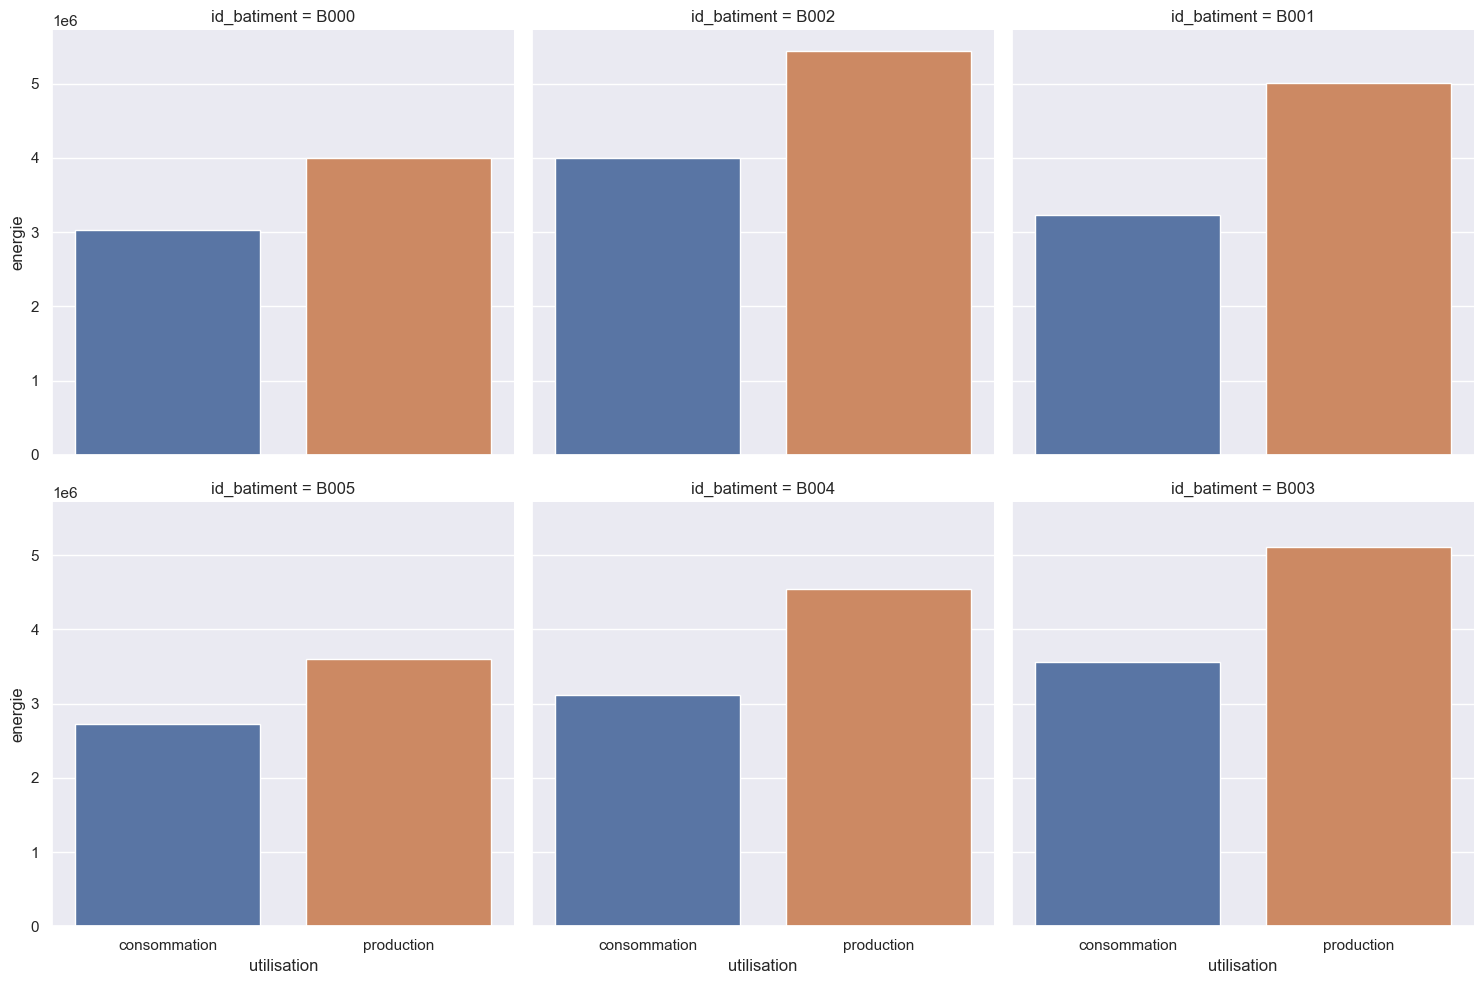

In [14]:
conso_prod = pd.read_csv('./data/conso_prod.csv')
conso_prod = pd.melt(conso_prod, id_vars=['id_batiment'], value_vars=['consommation', 'production'], value_name = 'energie', var_name ='utilisation')

sns.catplot(data = conso_prod,
            x = 'utilisation',
            y = 'energie',
            hue = 'utilisation',
            col = 'id_batiment',
            col_wrap= 3,
            kind = 'bar',
            legend = False)

In [15]:
pingouin.ttest(x = consommation['consommation_kwh'],
               y = production['quantite_produite'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-10.76907,1396.260259,two-sided,4.914531e-26,"[-116.39, -80.52]",0.556138,5.912e+22,1.0


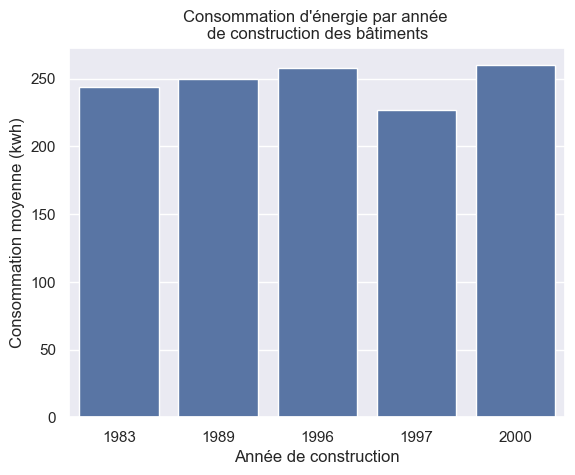

In [16]:
avg_conso_annee = pd.read_csv('./data/avg_conso_annee.csv')
fig, ax = plt.subplots()
sns.barplot(data = avg_conso_annee,
            x = 'annee_construction',
            y = 'avg_consommation',
            ax =ax)

ax.set_xlabel('Année de construction')
ax.set_ylabel('Consommation moyenne (kwh)')
ax.set_title("Consommation d'énergie par année \nde construction des bâtiments")

plt.show()

Text(0.5, 1.0, "Consommation d'énergie par \nsurface de bâtiment")

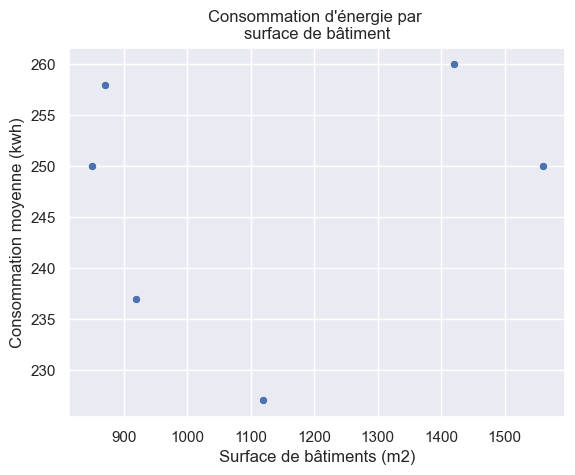

In [17]:
conso_surf = pd.read_csv('./data/conso_surf.csv')

fig, ax = plt.subplots()
sns.scatterplot(data = conso_surf,
                x = 'surface',
                y = 'avg_consommation',
                ax = ax)

ax.set_xlabel('Surface de bâtiments (m2)')
ax.set_ylabel('Consommation moyenne (kwh)')
ax.set_title("Consommation d'énergie par \nsurface de bâtiment")

In [18]:
conso_surf.corr().iloc[0, 1]

0.190064323292323

Text(0.5, 1.0, "Consommation d'énergie par \ntype de surface de bâtiment")

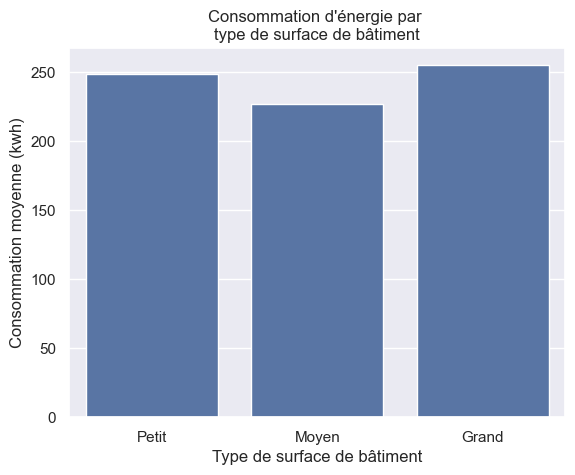

In [19]:
conso_type_surf = pd.read_csv('./data/conso_type_surf.csv')

fig, ax = plt.subplots()
sns.barplot(data = conso_type_surf,
            x = 'type_surface',
            y = 'avg_consommation',
            errorbar= ('ci',False),
            order = ['Petit', 'Moyen', 'Grand'],
            ax = ax)

ax.set_xlabel('Type de surface de bâtiment')
ax.set_ylabel('Consommation moyenne (kwh)')
ax.set_title("Consommation d'énergie par \ntype de surface de bâtiment")

In [20]:

pingouin.anova(data=conso_type_surf,
               dv='avg_consommation',
               between = 'type_surface')

,Source,ddof1,ddof2,F,p-unc,np2
0,type_surface,2,3,2.912621,0.198195,0.660066
